In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

**Crime Data** ( Using Hierarchical Clustering)

In [2]:
data = pd.read_csv("crime_data.csv")

In [3]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
crime_hierarchical = norm_func(data.iloc[:,1:])

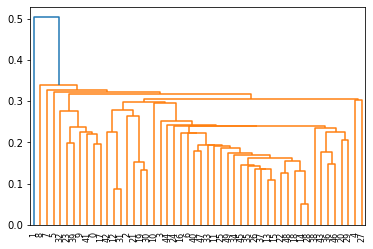

In [6]:
dendrogram = sch.dendrogram(sch.linkage(crime_hierarchical, method='single'))

In [7]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [8]:
y_hc = hc.fit_predict(crime_hierarchical)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
y_hc

array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [9]:
crime_hierarchical['clusterid_hierarchical'] = y_hc
crime_hierarchical.head()

,Murder,Assault,UrbanPop,Rape,clusterid_hierarchical
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,3
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,0


**Crime Data** ( Using K means Clustering)

In [10]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [11]:
crime_data_kmeans = pd.read_csv("crime_data.csv")

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_kmeans = scaler.fit_transform(crime_data_kmeans.iloc[:,1:])

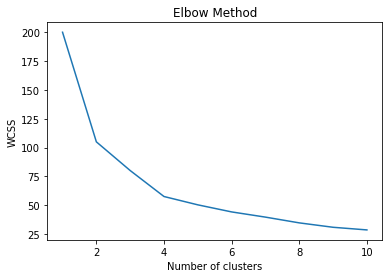

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_kmeans)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
from sklearn.cluster import KMeans
clusters_kmeans = KMeans(4, random_state=42)
clusters_kmeans.fit(scaled_crime_kmeans)

KMeans(n_clusters=4, random_state=42)

In [15]:
clusters_kmeans.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [16]:
crime_data_kmeans['clusterid_Kmeans'] = clusters_kmeans.labels_

In [17]:
 clusters_kmeans.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [18]:
crime_data_kmeans.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

,clusterid_Kmeans,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,5.656250,138.875000,73.875000,18.781250
2,2,3.600000,78.538462,52.076923,12.176923
3,3,10.815385,257.384615,76.000000,33.192308


In [19]:
crime_data_kmeans.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_Kmeans
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,3


**Crime Data** ( DB SCAN)

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [21]:
data1 = pd.read_csv("crime_data.csv")

In [22]:
scaler = StandardScaler()
crime_DBSCAN = scaler.fit_transform(data1.iloc[:,1:])

In [23]:
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit(crime_DBSCAN)

DBSCAN(eps=1, min_samples=3)

In [24]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1],
      dtype=int32)

In [25]:
cl=pd.DataFrame(dbscan.labels_,columns=['clusterid_DBscan'])

In [26]:
cl

,clusterid_DBscan
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,0


In [27]:
pd.concat([data1,cl],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_DBscan
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


**Airlines Data** ( Using Hierarchical Clustering)

In [28]:
Airlinesdata = pd.read_excel("EastWestAirlines.XLSX",sheet_name= "data") 

In [29]:
Airlinesdata

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [30]:
Airlinesdata.drop('ID#', axis=1, inplace=True)

In [31]:
Airlinesdata

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [32]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [33]:
EastWestAirlines_hierarchical = norm_func(Airlinesdata.iloc[:,0:10])

In [34]:
hc1 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [35]:
y_hc1 = hc1.fit_predict(EastWestAirlines_hierarchical)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
y_hc1

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [36]:
EastWestAirlines_hierarchical['clusterid_hierarchical1'] = y_hc1
EastWestAirlines_hierarchical

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterid_hierarchical1
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0


**EastWestAirlines** ( Using K means Clustering)

In [37]:
Airlinesdata_Kmeans = pd.read_excel("EastWestAirlines.XLSX",sheet_name= "data") 

In [38]:
Airlinesdata_Kmeans.drop('ID#', axis=1, inplace=True)

In [39]:
Airlinesdata_Kmeans

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [40]:
scaler = StandardScaler()
scaled_Airlinesdata_Kmeans = scaler.fit_transform(Airlinesdata_Kmeans.iloc[:,1:])

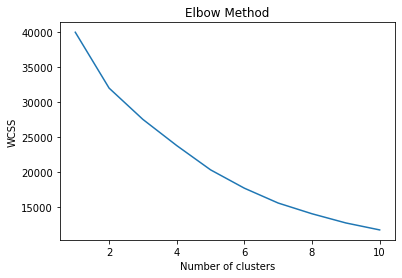

In [41]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Airlinesdata_Kmeans)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
clusters_kmeans1 = KMeans(7, random_state=42)
clusters_kmeans1.fit(scaled_Airlinesdata_Kmeans)

KMeans(n_clusters=7, random_state=42)

In [43]:
clusters_kmeans1.labels_

array([2, 2, 2, ..., 0, 2, 2])

In [44]:
Airlinesdata_Kmeans['clusterid_kmeans1'] = clusters_kmeans1.labels_

In [45]:
Airlinesdata_Kmeans.groupby('clusterid_kmeans1').agg(['mean']).reset_index()

,clusterid_kmeans1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,67879.314110,98.031902,1.685890,1.000000,1.000000,10573.067485,10.419632,422.812270,1.298160,4302.587730,1.000000
1,1,168254.958678,471.165289,2.305785,1.000000,1.000000,35148.925620,29.983471,6161.743802,17.842975,4641.537190,0.793388
2,2,45345.272291,31.953500,1.328380,1.000000,1.000479,4912.343241,7.240652,156.024928,0.465005,3662.702780,0.000000
3,3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,4,115243.642857,5590.535714,2.053571,1.000000,1.000000,19452.428571,12.339286,947.625000,2.857143,3893.660714,0.517857
5,5,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
6,6,130445.796060,66.628042,4.166860,1.000000,1.002317,49032.566628,20.053302,392.134415,1.190035,4986.754345,0.597914


In [46]:
Airlinesdata_Kmeans

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_kmeans1
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


**EastWestAirlines Data** ( DB SCAN)

In [47]:
Airlinesdata_DBSCAN = pd.read_excel("EastWestAirlines.XLSX",sheet_name= "data") 

In [48]:
Airlinesdata_DBSCAN.drop('ID#', axis=1, inplace=True)

In [49]:
scaler = StandardScaler()
Airlines_DBSCAN = scaler.fit_transform(Airlinesdata_DBSCAN.iloc[:,1:10])

In [50]:
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan.fit(Airlines_DBSCAN)

DBSCAN(min_samples=3)

In [51]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [52]:
DBSCANcl=pd.DataFrame(dbscan.labels_,columns=['clusterid_DBscan1'])

In [53]:
DBSCANcl.head()

,clusterid_DBscan1
0,0
1,0
2,0
3,0
4,-1


In [54]:
pd.concat([Airlinesdata_DBSCAN,DBSCANcl],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_DBscan1
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0
